# The Brain Tumor Detection



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import glob
from IPython.display import Image, display
import re
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
#!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

# from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v8/brain.yaml epochs=50 imgsz=640 batch=16 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v8/brain.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/train/weights/best.pt data=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v8/brain.yaml

/content
2023-11-30 12:56:58.753194: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 12:56:58.753254: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 12:56:58.753297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 12:56:59.913784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/01_DataScience/09_BRAIN_

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v8/valid/images save=True save_txt=True

/content
2023-11-30 12:58:15.759007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 12:58:15.759071: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 12:58:15.759110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 12:58:16.905913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/drive/MyDrive/01_DataScience/09_BRAIN_TUM

**NOTE:** Let's take a look at few results.

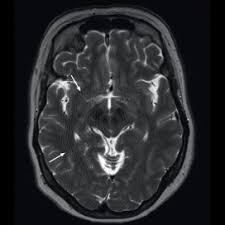

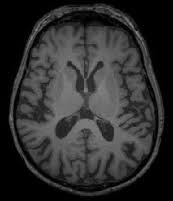

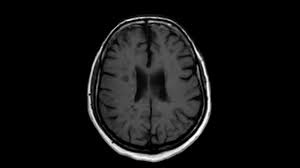

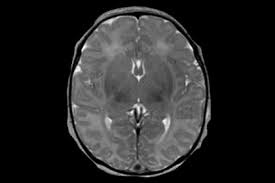

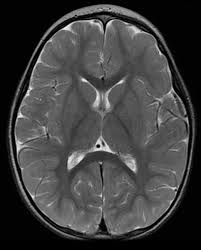

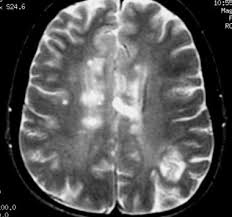

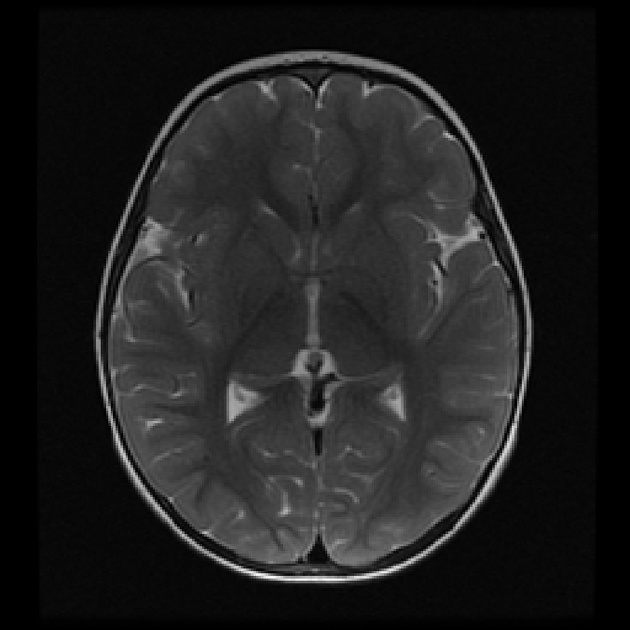

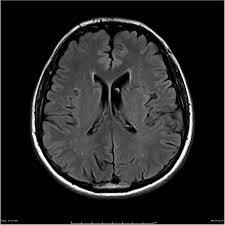

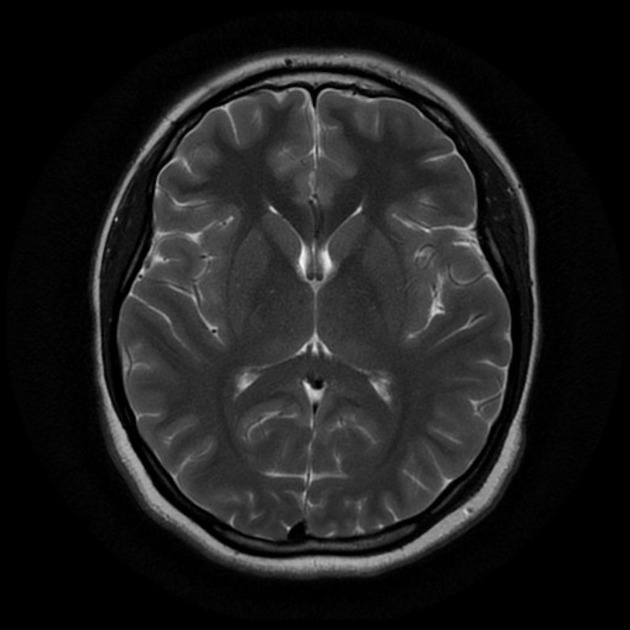

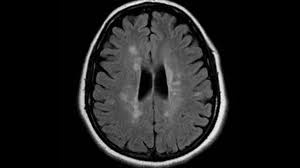

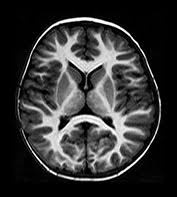

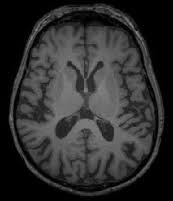

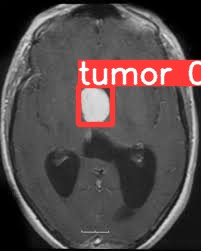

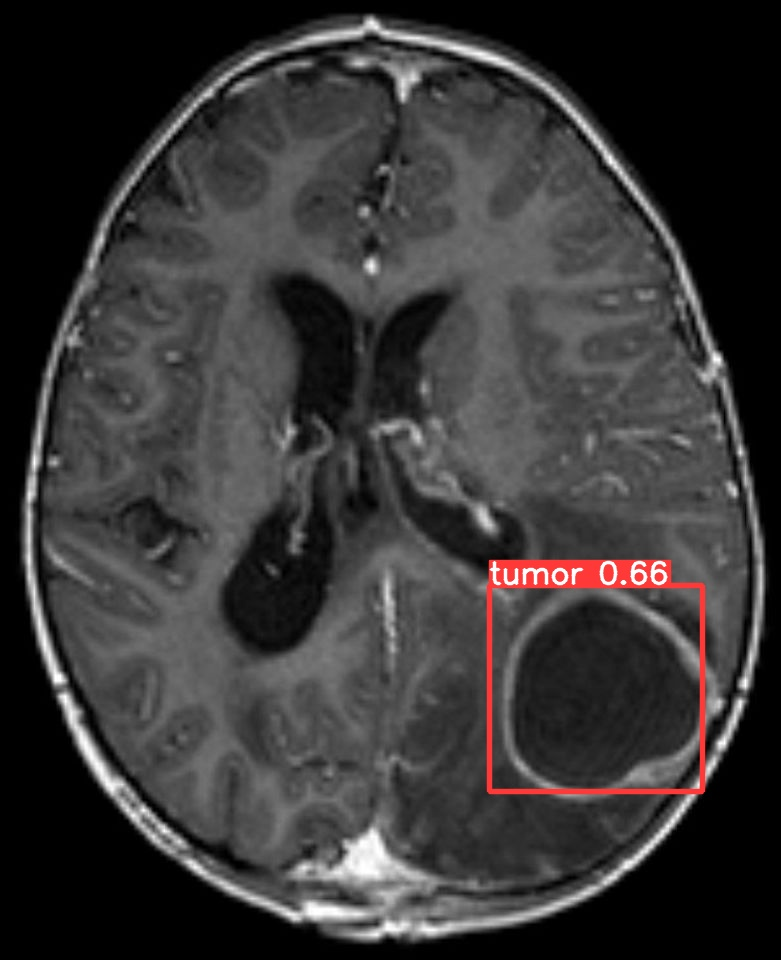

In [4]:
for image_path in glob.glob('/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/predict/*')[:14]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [20]:
def true_labels(path_to_val_ann):
  txt_img = []
  for x in sorted(glob.glob(f"{path_to_val_ann}"), key=numericalSort):
    lab=x.split('/')[-1]
    txt_img.append(lab.split('.')[0])

  true_lab=[]
  for x in txt_img:
    if 'Y' in x:
      true_lab.append(1)
    else:
      true_lab.append(0)

  return true_lab

In [21]:
true_lab = true_labels("/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v8/valid/labels/*.txt")

In [25]:
def pred_labels(path_to_lab, path_to_pred):
  lab = []
  for x in sorted(glob.glob(f"{path_to_lab}"), key=numericalSort):
    lab_=x.split('/')[-1]
    lab.append(lab_)
  pred = []
  for x in sorted(glob.glob(f"{path_to_pred}"), key=numericalSort):
    pred_=x.split('/')[-1]
    pred.append(pred_)

  result_list = [1 if elem in pred else 0 for elem in lab]
  return result_list


In [26]:
pred_lab = pred_labels("/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v8/valid/labels/*.txt", "/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/predict/labels/*.txt")

In [27]:
print(true_lab)
print(pred_lab)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [29]:
print(classification_report(true_lab, pred_lab))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



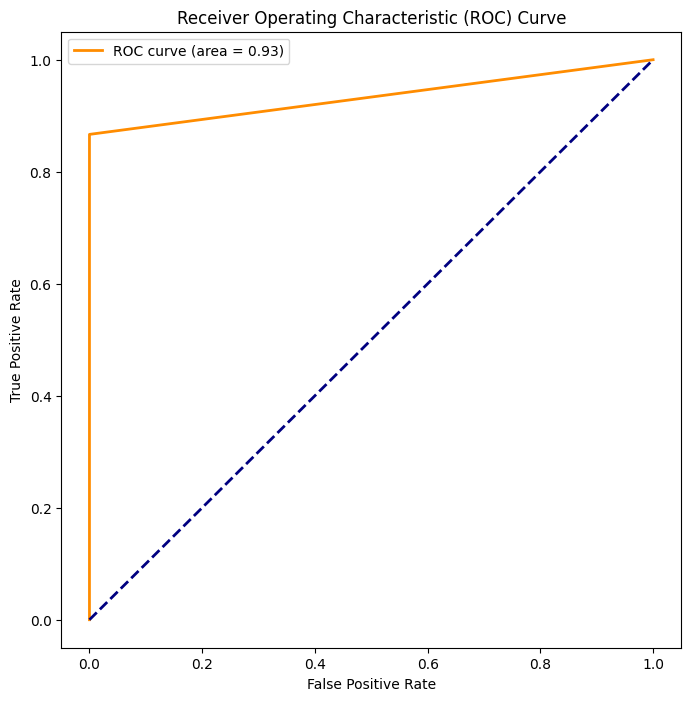

In [32]:
fpr, tpr, thresholds = roc_curve(true_lab, pred_lab)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()